### 파노라마 사진 생성
### (1) 좌측 사진을 우측사진에 매칭
### (2) 원근변환 행렬을 구하여, cv2.warpPerspective() 함수로 원근 변환 

good matches:49/500
img1


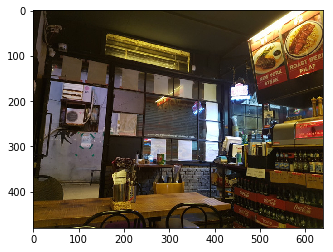

img2


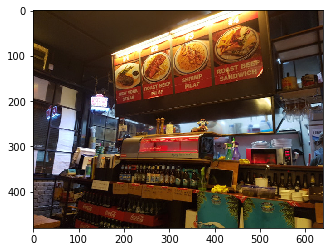

파노라마 완성 이미지


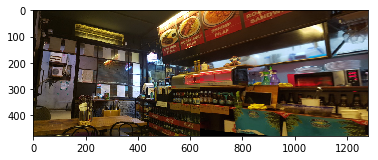

In [3]:
import cv2, numpy as np
import matplotlib.pyplot as plt 


#이미지 불러오기
img1 = cv2.imread('img/restaurant1.jpg')
img2 = cv2.imread('img/restaurant2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 검출기 생성
detector = cv2.ORB_create()
kp1, desc1  = detector.detectAndCompute(gray2, None)
kp2, desc2  = detector.detectAndCompute(gray1, None)

# 매칭기 생성
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)

# 매칭(knnMatch 이용)
matches = matcher.knnMatch(desc1, desc2 , 2)
# print("matches: ", matches)
# print(" ")

# 이웃 거리의 75%로 좋은 매칭점 추출---②
ratio = 0.65
good_matches = [first for first,second in matches \
                    if first.distance < second.distance * ratio]
print('good matches:%d/%d' %(len(good_matches),len(matches)))

# 좋은 매칭점의 queryIdx로 원본 영상의 좌표 구하기 ---③
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ])
    
# 좋은 매칭점의 trainIdx로 대상 영상의 좌표 구하기 ---④
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ])

mtrx, mask = cv2.findHomography(src_pts, dst_pts)

# 원본 영상 크기로 변환 영역 좌표 생성 ---⑥
w = img2.shape[1] + img1.shape[1]
h = img2.shape[0]

pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])

# 원본 영상 좌표를 원근 변환  ---⑦
dst = cv2.perspectiveTransform(pts, mtrx)

res = cv2.warpPerspective(img2, mtrx, (w, h))

res[0:img1.shape[0], 0:img1.shape[1]] = img1

cv2.imshow('Good Match', res)

print("img1")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
print("img2")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

print("파노라마 완성 이미지")
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

matches: 87/274, min: 12.00, max: 90.00, thresh: 35.40
img1


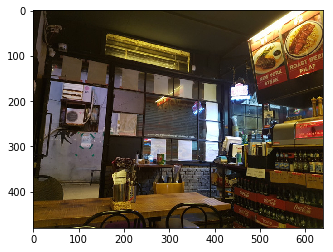

img2


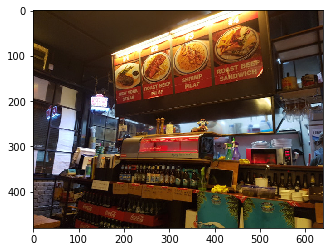

파노라마 완성 이미지


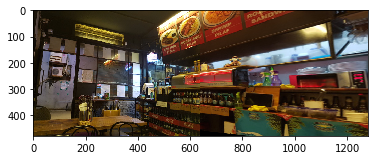

In [8]:
import cv2
import numpy as np

#이미지 불러오기
img1 = cv2.imread('img/restaurant1.jpg')
img2 = cv2.imread('img/restaurant2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 검출기 생성
detector = cv2.ORB_create()
kp1, des1 = detector.detectAndCompute(gray2, None)
kp2, des2 = detector.detectAndCompute(gray1, None)

# 매칭기 생성
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# 매칭
matches = matcher.match(des1, des2)


# 좋은 매칭점 찾기
matches = sorted(matches, key=lambda x:x.distance)

min_dist, max_dist = matches[0].distance, matches[-1].distance

ratio = 0.3
good_thresh = (max_dist - min_dist)*ratio + min_dist

good_matches = [m for m in matches if m.distance < good_thresh]
print('matches: %d/%d, min: %.2f, max: %.2f, thresh: %.2f' %(len(good_matches),len(matches), min_dist, max_dist, good_thresh))

# 원근변환
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ])

dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ])

mtrx, mask = cv2.findHomography(src_pts, dst_pts)

w = img1.shape[1] + img2.shape[1]
h = img1.shape[0]

pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])

dst = cv2.perspectiveTransform(pts,mtrx)

res = cv2.cv2.warpPerspective(img2, mtrx, (w, h))

res[0:img1.shape[0], 0:img1.shape[1]] = img1

cv2.imshow('goodMatch', res)

print("img1")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
print("img2")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

print("파노라마 완성 이미지")
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()



파노라마 완성 이미지


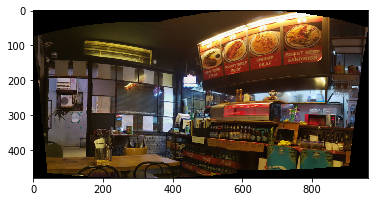

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

images = []
images.append(cv2.imread('img/restaurant1.jpg', cv2.IMREAD_COLOR))
images.append(cv2.imread('img/restaurant2.jpg', cv2.IMREAD_COLOR))


# createStitcher 함수를 이용한 파노라마 이미지 생성
stitcher = cv2.createStitcher()
ret, pano = stitcher.stitch(images)

if ret == cv2.STITCHER_OK:
    cv2.imshow('panorama', pano)
    cv2.waitKey()

    cv2.destroyAllWindows()
else:
    print('Error during stiching')
    
print("파노라마 완성 이미지")
plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
plt.show()